<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

**CURSO DE PÓS-GRADUAÇÃO EM CIÊNCIA DE DADOS (BIG DATA PROCESSING AND ANALYTICS)**<p>
**Componente curricular:** BIG DATA ANALYTICS: ANÁLISE ESTATÍSTICA - 91162 - 2022.2 - 01D - Trilha 6.<br>

**Aluno:** ROBSON DE FREITAS SAMPAIO.<br>

**URL deste notebook:** https://github.com/rfsampaio/postgraduate_data_science/blob/main/notebooks/AE_T6.ipynb<br>
***

### **Atividade - Trilha 6**

#### **Problema 1**

Vamos fazer um exercício de Regressão Logística, trabalhando com a base de dados do Titanic.

Utilizaremos os arquivos disponibilizados no Moodle que foram preparados para esta atividade. Embora os nomes sejam os mesmos, estes arquivos do Moodle poder ser diferentes (em conteúdo) daqueles encontrados no site Kaggle.

A base de dados (treinamento) é uma coleção de dados sobre alguns dos passageiros (891 ou 892) e o objetivo é prever a sobrevivência (1 se o passageiro sobreviveu ou 0 caso contrário), baseado em algumas características tais como classe de serviço, sexo, idade, etc. A base de dados de teste tem a mesma estrutura da base de treinamento, mas a variável **"Survived"** não contém nenhum valor (ou não está presente). Depois de construir seu modelo, você vai aplicá-lo à este conjunto de dados de teste e prever o valor da variável **"Survived"**.

Como se pode ver, utilizaremos tanto variáveis categóricas como contínuas. Quando trabalhamos com uma base de dados real, precisamos levar em conta o fato de podermos ter dados faltantes ou corrompidos, e, portanto, precisamos preparar a base de dados para nossa análise.

As tarefas a serem realizadas são:

a) Fazer a preparação dos dados para serem utilizados na análise, considerando que serão utilizadas apenas as variáveis "Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked".

* i) Do conjunto de dados original, você deve selecionar um subconjunto apenas com as variáveis indicadas acima e a variável "PassengerId".

* ii) Você deve atribuir um valor para os NAs na variável Age. Utilize algum critério razoável, por exemplo, o valor médio.

* iii) Você deve remover as linhas onde ainda estejam faltando dados, depois de atribuir o valor para os NAs de "Age". Poucas linhas estarão ainda com dados faltantes.

b) Você deve criar um modelo onde **"Survived"** será uma função das demais variáveis.

c) Faça as análises do modelo, verificando a significância estatística das variáveis (e seus parâmetros ajustados), gráficos diagnósticos, etc.

d) Atualize o modelo como consequência da análise realizada no item anterior.

e) Faça as previsões da variável **"Survived"** na base de dados de teste utilizando o modelo refinado, e prepare um arquivo CSV para submissão que contenha apenas duas colunas: "PassengerId", "Survived".

### **Carregando bibliotecas necessárias:**

In [133]:
library(tidyverse)

### **Resolução:**

---
#### **Problema 1**
---

**Item a)**

Definindo o diretório dos datasets:

In [134]:
# definindo o diretório de datasets
setwd('../data')

Dicionário dos datasets de treinamento e de teste:

| Variável | Descrição |
|---|---|
| PassengerId |	Identificador do Passageiro |
| Survived | Variável indicadora de sobrevivência (0 = Não Sobreviveu, 1 = Sobreviveu) | 
| Pclass | Classe do passageiro |
| Name | Nome do passageiro |
| Sex |	Sexo do passageiro |
| Age |	Idade do passageiro |
| SibSp | Número de irmãos/cônjuge no navio |
| Parch | Número de pais e filhos no navio |
| Ticket | Número da passagem |
| Fare | Preço da passagem |
| Cabin | Código da cabine |
| Embarked | Porto de embarque |

Carregando o dataset de treinamento, gerando um dataframe com as variáveis relevantes, exibindo sua estrutura e seu sumário estatístico:

In [135]:
# lendo o dataset
data_train <- read.csv('titanic_dw_train.csv', sep=",", header=T)

# criando um dataframe com as variáveis relevantes a partir do dataset
train_df <- as.data.frame(data_train[,c('PassengerId', 'Survived', 'Pclass', 'Sex', 'Age',
                                        'SibSp', 'Parch', 'Fare', 'Embarked')])

Agora, vamos entender o conceito de variáveis "dummy". Suponha que uma variável "A" tenha "n" classes. Esta variável "A" pode ser substituída por "n-1" variáveis. Se "A" tiver "i", "j", "k", …, classes, então "A_i" = 1 nas linhas em que "i" aparece na coluna de "A" e "0" para o restante das linhas. O mesmo se aplica para "j", "k", etc. O último valor é tratado pela interceptação. Então, vamos introduzir 2 variáveis fictícias dentro do dataframe a partir da variável "Embarked", pois ela contêm dados categóricos.

In [136]:
# criando 2 variáveis "dummy" a partir da variável "Embarked"
train_df$Embarked_C = ifelse(train_df$Embarked=="C", 1, 0)
train_df$Embarked_S = ifelse(train_df$Embarked=="S", 1, 0)

# removendo a variável "Embarked" do dataframe
train_df$Embarked <- NULL

Visualizando informações do dataframe de treinamento após as modificações acima:

In [137]:
# visualizando o início do dataframe
head(train_df)

# visualizando o final do dataframe
tail(train_df)

# exibindo a estrutura dos dados
str(train_df)

# exibindo o sumário estatístico
summary(train_df)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S
,<int>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,2,0,3,male,29,0,0,7.8542,0,1
2,3,1,1,female,37,1,0,90.0000,0,0
3,4,0,2,male,36,0,0,13.0000,0,1
4,5,1,1,female,NA,0,1,55.0000,0,1
5,6,0,3,male,30,0,0,8.0500,0,1
6,10,0,3,male,21,1,0,6.4958,0,1


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S
,<int>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
886,1296,0,3,male,NA,0,0,7.7750,0,1
887,1297,1,1,male,36,0,0,26.3875,0,1
888,1298,0,2,male,22,2,0,31.5000,0,1
889,1299,1,2,female,24,0,0,13.0000,0,1
890,1303,0,3,male,31,0,0,7.7750,0,1
891,1304,0,3,male,21,0,0,8.0500,0,1


'data.frame':	891 obs. of  10 variables:
 $ PassengerId: int  2 3 4 5 6 10 11 12 13 15 ...
 $ Survived   : int  0 1 0 1 0 0 1 0 0 1 ...
 $ Pclass     : int  3 1 2 1 3 3 1 3 3 2 ...
 $ Sex        : chr  "male" "female" "male" "female" ...
 $ Age        : num  29 37 36 NA 30 21 53 20 26 62 ...
 $ SibSp      : int  0 1 0 0 0 1 1 0 0 0 ...
 $ Parch      : int  0 0 0 1 0 0 1 0 0 0 ...
 $ Fare       : num  7.85 90 13 55 8.05 ...
 $ Embarked_C : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Embarked_S : num  1 0 1 1 1 1 1 1 1 1 ...


  PassengerId        Survived          Pclass          Sex           
 Min.   :   2.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.: 338.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median : 667.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   : 656.1   Mean   :0.3771   Mean   :2.293                     
 3rd Qu.: 979.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :1304.0   Max.   :1.0000   Max.   :3.000                     
                                                                     
      Age              SibSp            Parch            Fare        
 Min.   : 0.1667   Min.   :0.0000   Min.   :0.000   Min.   :  0.000  
 1st Qu.:21.0000   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:  7.896  
 Median :28.0000   Median :0.0000   Median :0.000   Median : 14.500  
 Mean   :29.9936   Mean   :0.5286   Mean   :0.431   Mean   : 34.046  
 3rd Qu.:39.0000   3rd Qu.:1.0000   3rd Qu.:0.000   3rd Qu.: 31.387  
 Max.   :80.0000   M

Verificando e tratando valores faltantes no dataframe de treinamento:

In [138]:
# verificando se existem valores faltantes no dataframe de treinamento (NAs)
as.data.frame(colSums(is.na(train_df)))

,colSums(is.na(train_df))
,<dbl>
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,172
SibSp,0
Parch,0
Fare,1
Embarked_C,1


In [139]:
# preenchendo os valores faltantes na variável "Age"
train_df$Age[is.na(train_df$Age)] <- mean(train_df$Age, na.rm=T)

# removendo os valores faltantes nas variáveis "Fare", "Embarked_C" e "Embarked_S"
train_df = train_df[!is.na(train_df$Fare),]
train_df = train_df[!is.na(train_df$Embarked_C),]
train_df = train_df[!is.na(train_df$Embarked_S),]

Valores faltantes tratados:

In [140]:
# verificando se existem valores faltantes no dataframe (NAs)
as.data.frame(colSums(is.na(train_df)))

,colSums(is.na(train_df))
,<dbl>
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked_C,0


Exibindo novamente o início e o final do dataframe de treinamento e seu sumário estatístico:

In [141]:
# visualizando o início do dataframe
head(train_df)

# visualizando o final do dataframe
tail(train_df)

# exibindo o sumário estatístico
summary(train_df)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S
,<int>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,2,0,3,male,29.00000,0,0,7.8542,0,1
2,3,1,1,female,37.00000,1,0,90.0000,0,0
3,4,0,2,male,36.00000,0,0,13.0000,0,1
4,5,1,1,female,29.99363,0,1,55.0000,0,1
5,6,0,3,male,30.00000,0,0,8.0500,0,1
6,10,0,3,male,21.00000,1,0,6.4958,0,1


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S
,<int>,<int>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
886,1296,0,3,male,29.99363,0,0,7.7750,0,1
887,1297,1,1,male,36.00000,0,0,26.3875,0,1
888,1298,0,2,male,22.00000,2,0,31.5000,0,1
889,1299,1,2,female,24.00000,0,0,13.0000,0,1
890,1303,0,3,male,31.00000,0,0,7.7750,0,1
891,1304,0,3,male,21.00000,0,0,8.0500,0,1


  PassengerId        Survived          Pclass          Sex           
 Min.   :   2.0   Min.   :0.0000   Min.   :1.000   Length:889        
 1st Qu.: 339.0   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median : 668.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   : 656.8   Mean   :0.3768   Mean   :2.294                     
 3rd Qu.: 980.0   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :1304.0   Max.   :1.0000   Max.   :3.000                     
      Age              SibSp            Parch             Fare        
 Min.   : 0.1667   Min.   :0.0000   Min.   :0.0000   Min.   :  0.000  
 1st Qu.:22.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:  7.896  
 Median :29.9936   Median :0.0000   Median :0.0000   Median : 14.500  
 Mean   :29.9233   Mean   :0.5298   Mean   :0.4319   Mean   : 33.995  
 3rd Qu.:35.0000   3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.: 31.387  
 Max.   :80.0000   Max.   :8.0000   Max.   :9.0000   Max.   :512.329  
   Embarked_C

Carregando o dataset de teste, gerando um dataframe com as variáveis relevantes, exibindo sua estrutura e seu sumário estatístico:

In [142]:
# lendo o dataset
data_test <- read.csv('titanic_dw_test.csv', sep=",", header=T)

# criando um dataframe com as variáveis relevantes a partir do dataset
test_df <- as.data.frame(data_test[,c('PassengerId', 'Pclass', 'Sex', 'Age',
                                      'SibSp', 'Parch', 'Fare', 'Embarked')])

Realizando tratamentos no dataframe de teste, conforme realizado no dataframe de treinamento:

In [143]:
# criando 2 variáveis "dummy" a partir da variável "Embarked"
test_df$Embarked_C = ifelse(test_df$Embarked=="C", 1, 0)
test_df$Embarked_S = ifelse(test_df$Embarked=="S", 1, 0)

# removendo a variável "Embarked" do dataframe
test_df$Embarked <- NULL

# criando a variável "Survived" no dataframe e preenchendo com NA
# test_df$Survived <- NA

In [144]:
# visualizando o início do dataframe
head(test_df)

# visualizando o final do dataframe
tail(test_df)

# exibindo a estrutura dos dados
str(test_df)

# exibindo o sumário estatístico
summary(test_df)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S
,<int>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1,2,male,41,0,0,15.0458,1,0
2,7,3,male,26,0,0,56.4958,0,1
3,8,1,female,54,1,0,78.2667,1,0
4,9,1,female,48,1,1,79.2000,1,0
5,14,1,male,62,0,0,26.5500,0,1
6,16,1,female,36,0,2,71.0000,0,1


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S
,<int>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
413,1302,2,male,28,0,0,10.500,0,1
414,1305,1,male,NA,0,0,35.500,0,1
415,1306,3,male,28,0,0,9.500,0,1
416,1307,3,male,21,0,0,7.750,0,0
417,1308,2,male,39,0,0,26.000,0,1
418,1309,3,male,16,0,0,7.775,0,1


'data.frame':	418 obs. of  9 variables:
 $ PassengerId: int  1 7 8 9 14 16 20 23 29 37 ...
 $ Pclass     : int  2 3 1 1 1 1 3 3 1 3 ...
 $ Sex        : chr  "male" "male" "female" "female" ...
 $ Age        : num  41 26 54 48 62 36 21 NA 45 22 ...
 $ SibSp      : int  0 0 1 1 0 0 2 0 0 0 ...
 $ Parch      : int  0 0 0 1 0 2 0 0 0 0 ...
 $ Fare       : num  15 56.5 78.3 79.2 26.6 ...
 $ Embarked_C : num  1 0 1 1 0 0 0 0 0 1 ...
 $ Embarked_S : num  0 1 0 0 1 1 1 1 1 0 ...


  PassengerId         Pclass          Sex                 Age       
 Min.   :   1.0   Min.   :1.000   Length:418         Min.   : 0.75  
 1st Qu.: 313.2   1st Qu.:2.000   Class :character   1st Qu.:21.00  
 Median : 638.5   Median :3.000   Mode  :character   Median :28.00  
 Mean   : 652.7   Mean   :2.299                      Mean   :29.63  
 3rd Qu.: 983.8   3rd Qu.:3.000                      3rd Qu.:38.00  
 Max.   :1309.0   Max.   :3.000                      Max.   :65.00  
                                                     NA's   :91     
     SibSp            Parch             Fare           Embarked_C    
 Min.   :0.0000   Min.   :0.0000   Min.   :  0.000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:  7.896   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median : 13.500   Median :0.0000  
 Mean   :0.4354   Mean   :0.2871   Mean   : 31.697   Mean   :0.2014  
 3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.: 29.125   3rd Qu.:0.0000  
 Max.   :8.0000   Max.   :4.

Verificando e tratando valores faltantes no dataframe de teste:

In [145]:
# verificando se existem valores faltantes no dataframe (NAs)
as.data.frame(colSums(is.na(test_df)))

,colSums(is.na(test_df))
,<dbl>
PassengerId,0
Pclass,0
Sex,0
Age,91
SibSp,0
Parch,0
Fare,0
Embarked_C,1
Embarked_S,1


In [146]:
# preenchendo os valores faltantes na variável "Age"
test_df$Age[is.na(test_df$Age)] <- mean(test_df$Age, na.rm=T)

# removendo os valores faltantes nas variáveis "Fare", "Embarked_C" e "Embarked_S"
test_df = test_df[!is.na(test_df$Fare),]
test_df = test_df[!is.na(test_df$Embarked_C),]
test_df = test_df[!is.na(test_df$Embarked_S),]

Valores faltantes tratados:

In [147]:
# verificando se existem valores faltantes no dataframe (NAs)
as.data.frame(colSums(is.na(test_df)))

,colSums(is.na(test_df))
,<dbl>
PassengerId,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked_C,0
Embarked_S,0


Exibindo novamente o início e o final do dataframe de teste e seu sumário estatístico:

In [148]:
# visualizando o início do dataframe
head(test_df)

# visualizando o final do dataframe
tail(test_df)

# exibindo o sumário estatístico
summary(test_df)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S
,<int>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1,2,male,41,0,0,15.0458,1,0
2,7,3,male,26,0,0,56.4958,0,1
3,8,1,female,54,1,0,78.2667,1,0
4,9,1,female,48,1,1,79.2000,1,0
5,14,1,male,62,0,0,26.5500,0,1
6,16,1,female,36,0,2,71.0000,0,1


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S
,<int>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>
413,1302,2,male,28.00000,0,0,10.500,0,1
414,1305,1,male,29.63379,0,0,35.500,0,1
415,1306,3,male,28.00000,0,0,9.500,0,1
416,1307,3,male,21.00000,0,0,7.750,0,0
417,1308,2,male,39.00000,0,0,26.000,0,1
418,1309,3,male,16.00000,0,0,7.775,0,1


  PassengerId         Pclass          Sex                 Age       
 Min.   :   1.0   Min.   :1.000   Length:417         Min.   : 0.75  
 1st Qu.: 313.0   1st Qu.:2.000   Class :character   1st Qu.:23.00  
 Median : 636.0   Median :3.000   Mode  :character   Median :29.63  
 Mean   : 652.2   Mean   :2.302                      Mean   :29.61  
 3rd Qu.: 984.0   3rd Qu.:3.000                      3rd Qu.:35.00  
 Max.   :1309.0   Max.   :3.000                      Max.   :65.00  
     SibSp            Parch             Fare           Embarked_C    
 Min.   :0.0000   Min.   :0.0000   Min.   :  0.000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:  7.896   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median : 13.500   Median :0.0000  
 Mean   :0.4365   Mean   :0.2878   Mean   : 31.581   Mean   :0.2014  
 3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.: 29.125   3rd Qu.:0.0000  
 Max.   :8.0000   Max.   :4.0000   Max.   :263.000   Max.   :1.0000  
   Embarked_S    
 Min.   :

**Item b)**

Criando um modelo onde **"Survived"** é uma função das demais variáveis, a partir do dataframe de treinamento.

In [149]:
# modelo
reg.model1 = glm(Survived ~ Pclass + Sex + Age + SibSp + Parch +
                            Fare + Embarked_C + Embarked_S, family=binomial, data=train_df)

# sumário estatístico do modelo
summary(reg.model1)


Call:
glm(formula = Survived ~ Pclass + Sex + Age + SibSp + Parch + 
    Fare + Embarked_C + Embarked_S, family = binomial, data = train_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4943  -0.6638  -0.4370   0.6726   2.3739  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  4.127756   0.607090   6.799 1.05e-11 ***
Pclass      -0.954492   0.140705  -6.784 1.17e-11 ***
Sexmale     -2.643924   0.197452 -13.390  < 2e-16 ***
Age         -0.030371   0.007309  -4.155 3.25e-05 ***
SibSp       -0.234980   0.102626  -2.290    0.022 *  
Parch       -0.085397   0.100581  -0.849    0.396    
Fare         0.002566   0.002218   1.157    0.247    
Embarked_C   0.431480   0.360726   1.196    0.232    
Embarked_S  -0.030511   0.314741  -0.097    0.923    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1177.91  on 888  degrees of freedom
Residual

**Item c)**

Observamos que no modelo do item anterior temos variáveis sem significância estatística e precisamos removê-las do modelo, encontrando uma nova formula. Abaixo vamos utilizar a função "step" para nos ajudar com isso.

In [150]:
# utilizando a função step
stepmodel = step(reg.model1, direction="both")

Start:  AIC=832.17
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked_C + 
    Embarked_S

             Df Deviance     AIC
- Embarked_S  1   814.18  830.18
- Parch       1   814.91  830.91
- Embarked_C  1   815.61  831.61
- Fare        1   815.63  831.63
<none>            814.17  832.17
- SibSp       1   820.13  836.13
- Age         1   832.23  848.23
- Pclass      1   860.84  876.84
- Sex         1  1039.37 1055.37

Step:  AIC=830.18
Survived ~ Pclass + Sex + Age + SibSp + Parch + Fare + Embarked_C

             Df Deviance     AIC
- Parch       1   814.97  828.97
- Fare        1   815.67  829.67
<none>            814.18  830.18
+ Embarked_S  1   814.17  832.17
- Embarked_C  1   818.41  832.41
- SibSp       1   820.26  834.26
- Age         1   832.31  846.31
- Pclass      1   863.28  877.28
- Sex         1  1047.99 1061.99

Step:  AIC=828.97
Survived ~ Pclass + Sex + Age + SibSp + Fare + Embarked_C

             Df Deviance     AIC
- Fare        1   816.04  828.04
<none>

Formula proposta para o novo modelo:

In [151]:
# formula proposta para o novo modelo
formula(stepmodel)

Survived ~ Pclass + Sex + Age + SibSp + Embarked_C

Sumário estatístico do novo modelo proposto pela fórmula acima:

In [152]:
# sumário estatístico do modelo
summary(stepmodel)


Call:
glm(formula = Survived ~ Pclass + Sex + Age + SibSp + Embarked_C, 
    family = binomial, data = train_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4570  -0.6527  -0.4295   0.6661   2.3939  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  4.295314   0.460603   9.325  < 2e-16 ***
Pclass      -1.031363   0.119200  -8.652  < 2e-16 ***
Sexmale     -2.629294   0.188823 -13.925  < 2e-16 ***
Age         -0.030300   0.007265  -4.171 3.04e-05 ***
SibSp       -0.234949   0.096784  -2.428   0.0152 *  
Embarked_C   0.510058   0.217988   2.340   0.0193 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1177.91  on 888  degrees of freedom
Residual deviance:  816.04  on 883  degrees of freedom
AIC: 828.04

Number of Fisher Scoring iterations: 5


**Item d)**

Como vimos no item anterior, para a fórmula proposta pela função "step", temos todas as variáveis com significância estatística. Então, abaixo, segue a formalização do modelo proposto, utilizando o dataframe de treinamento.

In [153]:
# novo modelo proposto utilizando o dataframe de treinamento
reg.model2 = glm(Survived ~ Pclass + Sex + Age + SibSp + Embarked_C, family=binomial, data=train_df)

# sumário estatístico do modelo
summary(reg.model2)


Call:
glm(formula = Survived ~ Pclass + Sex + Age + SibSp + Embarked_C, 
    family = binomial, data = train_df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4570  -0.6527  -0.4295   0.6661   2.3939  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  4.295314   0.460603   9.325  < 2e-16 ***
Pclass      -1.031363   0.119200  -8.652  < 2e-16 ***
Sexmale     -2.629294   0.188823 -13.925  < 2e-16 ***
Age         -0.030300   0.007265  -4.171 3.04e-05 ***
SibSp       -0.234949   0.096784  -2.428   0.0152 *  
Embarked_C   0.510058   0.217988   2.340   0.0193 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1177.91  on 888  degrees of freedom
Residual deviance:  816.04  on 883  degrees of freedom
AIC: 828.04

Number of Fisher Scoring iterations: 5


Gráficos diagnósticos do modelo:

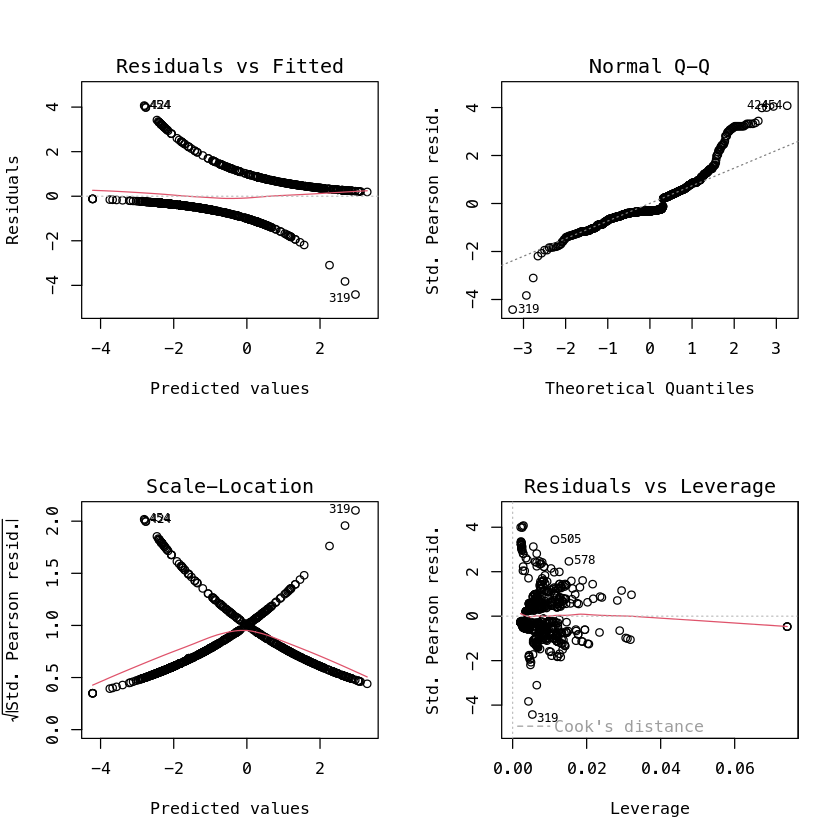

In [154]:
# exibindo os gráficos diagnósticos
par(mfrow=c(2,2))
plot(reg.model2)

Histograma de resíduos do modelo:

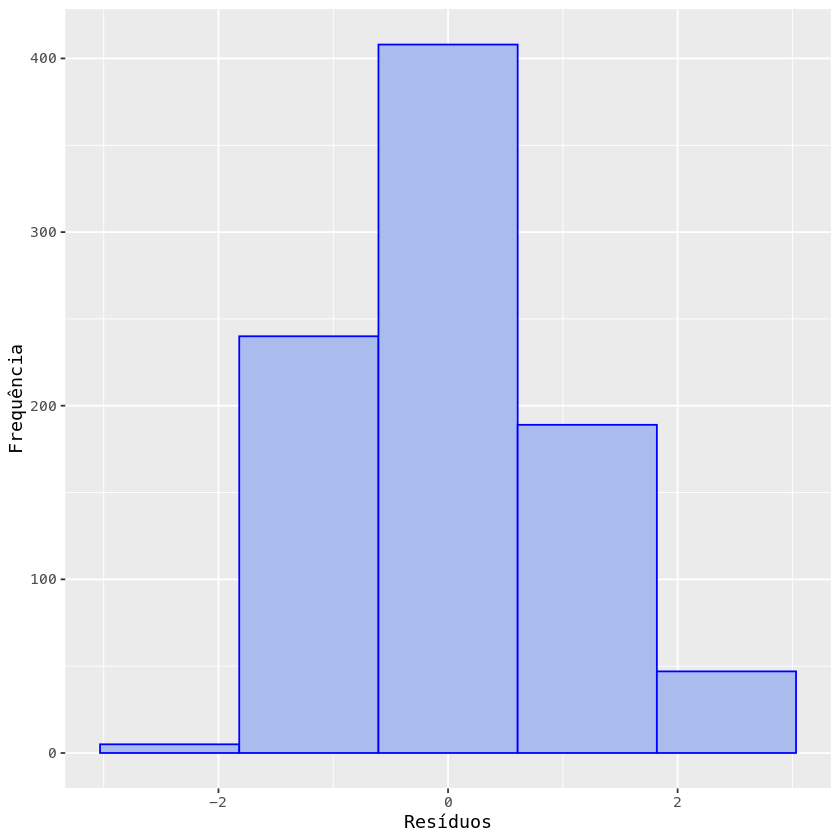

In [155]:
# exibindo o histograma dos resíduos
reg.model2.df <- as.data.frame(residuals(reg.model2))
names(reg.model2.df) <- c('residuos')
ggplot(data = reg.model2.df, aes(residuos)) +
    geom_histogram(fill='#aabbee', color='blue', stat='bin', bins=5) +
    xlab('Resíduos') +
    ylab('Frequência') +
    theme(plot.caption = element_text(hjust=0))

Predizendo o "score"  e calculando a acurácia do modelo para os dados de treinamento:

In [156]:
# predizendo o "score" do modelo para os dados de treinamento
train_df$Score <- predict(reg.model2, newdata=train_df, type="response")
head(train_df$Score)
tail(train_df$Score)

[1] 0.09056361 0.87078259 0.18429560 0.91334188 0.08809880 0.09117925

[1] 0.08811432 0.38789993 0.17752490 0.81837621 0.08569475 0.11260828

In [157]:
# criando a variável com a predição do modelo com os dados de treinamento
train_df$Prediction <- ifelse(train_df$Score>=0.6, 1, 0)
table(factor(train_df$Prediction), factor(train_df$Survived))

# calculando e mostrando o percentual de acurácia do modelo com os dados de treinamento
Accuracy = mean(train_df$Survived != train_df$Prediction)
print(paste('Accuracy: ', (1 - misClassifiError) * 100))

   
      0   1
  0 513 144
  1  41 191

[1] "Accuracy:  79.1901012373453"


Como observamos acima, a acurácia do modelo para os dados de treinamento é de 79,19%.

**Item e)**

Vejamos agora a aplicação do modelo para os dados de teste:

In [158]:
# predizendo o "score" do modelo para os dados de teste
test_df$Score <- predict(reg.model2, newdata=test_df, type="response")
head(test_df$Score)
tail(test_df$Score)

[1] 0.2443541 0.0983342 0.8702138 0.8894024 0.2237487 0.8978119

[1] 0.22354781 0.43456464 0.09309034 0.11260828 0.17102056 0.12865871

In [159]:
# criando a variável com a predição do modelo para os dados de teste
test_df$Survived <- ifelse(test_df$Score>=0.6, 1, 0)

head(test_df)
tail(test_df)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S,Score,Survived
,<int>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,2,male,41,0,0,15.0458,1,0,0.2443541,0
2,7,3,male,26,0,0,56.4958,0,1,0.0983342,0
3,8,1,female,54,1,0,78.2667,1,0,0.8702138,1
4,9,1,female,48,1,1,79.2000,1,0,0.8894024,1
5,14,1,male,62,0,0,26.5500,0,1,0.2237487,0
6,16,1,female,36,0,2,71.0000,0,1,0.8978119,1


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S,Score,Survived
,<int>,<int>,<chr>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
413,1302,2,male,28.00000,0,0,10.500,0,1,0.22354781,0
414,1305,1,male,29.63379,0,0,35.500,0,1,0.43456464,0
415,1306,3,male,28.00000,0,0,9.500,0,1,0.09309034,0
416,1307,3,male,21.00000,0,0,7.750,0,0,0.11260828,0
417,1308,2,male,39.00000,0,0,26.000,0,1,0.17102056,0
418,1309,3,male,16.00000,0,0,7.775,0,1,0.12865871,0


Gerando o arquivo CSV com as variáveis "PassengerId" e "Survived", a partir dos dados de teste, após a aplicação do modelo:

In [160]:
# criando um novo dataframe apenas com as variáveis para o arquivo CSV
df <- select(test_df, PassengerId, Survived)

# visualizando o início do dataframe
head(df)

# visualizando o final do dataframe
tail(df)

,PassengerId,Survived
,<int>,<dbl>
1,1,0
2,7,0
3,8,1
4,9,1
5,14,0
6,16,1


,PassengerId,Survived
,<int>,<dbl>
413,1302,0
414,1305,0
415,1306,0
416,1307,0
417,1308,0
418,1309,0


In [132]:
# gravando o arquivo CSV
write.csv2(df, file = 'previsao_Survived.csv', row.names = FALSE)